### IMPORT LIBRARIES

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### READING THE FILE AND INITIAL CHECK

In [5]:
# Read the csv file using 'read_csv'
df_src = pd.read_csv("./case_study_statistics/application_data.csv")

In [6]:
df_src.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Inspect the structure -Describe and Shape

In [7]:
df_src.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df_src.shape # rows and columns of original dataframe

(307511, 122)

In [9]:
df=df_src # keeping a safe copy of the original dataframe

In [10]:
average_income=round(df['AMT_INCOME_TOTAL'].mean(),2)
average_income

168797.92

In [11]:
percent_payment_diff=round((df['TARGET']==1).sum()/len(df['TARGET'])*100,2)
percent_payment_diff

8.07

<i>So initial analysis,even before the cleaning of the datasets indicates there are around <b>307511</b> applications for Loan recieved.
and the average income of the loan applicants is Rs.168797 i.e.<b> Rs.1.68L </b>
For the target column, we know 1 indicates client -he/she had payment difficulties in the past and 0 all other cases, here we could find <b>8.07%</b> of the applicants had a past history of payment difficulty.<i>

<b>Here, we get to see that most of the late payments are not due to monetary/economic issues , but for some other reasons only.</b>

### MISSING VALUES - DATA CLEANING

In [12]:
#Columnwise count and percntage of missing values
#This helps us in removing unnecessary columns.
total = df.isnull().sum().sort_values(ascending=False)
perc = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
pd.concat([total,round(perc,2)],axis=1,keys=['Total Null Values','Percentage of Null Values']) 
#table of null entries in each column



,Total Null Values,Percentage of Null Values
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [13]:
#Converting the Pandas series to Dataframe
perc2 = pd.DataFrame(perc).transpose()
#Listing all the column names of the DF.
list1 = list(perc2.columns.values)


In [14]:
#For initial drop of columns, we can keep a percentage limit.
#Here I could find many columns are having hugh percentage of missing values. So keeping 47% as kind of threshold.
list_to_drop=[]
for i in list1:
    if perc[i] > 47:
        list_to_drop.append(i)
list_to_drop   

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION

In [15]:
list_to_drop.remove('EXT_SOURCE_1')
list_to_drop

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALAR

In [16]:
len(list_to_drop) #Hence 49 columns to drop since the percentage values are high.

48

In [17]:
df = df.drop(list_to_drop,axis=1)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Df shape after initial data cleaning.
df.shape

(307511, 74)

In [19]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
df.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_1                   173378
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
NAME_TYPE_SUITE                  1292
DEF_60_CNT_SOCIAL_CIRCLE         1021
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
NAME_EDUCATION_TYPE                 0
FLAG_OWN_REALTY                     0
TARGET                              0
FLAG_EMAIL                          0
FLAG_PHONE                          0
FLAG_CONT_MOBILE                    0
NAME_CONTRACT_TYPE                  0
FLAG_WORK_PH

In [20]:
# The rows for which the sum of Null is less than or equal to five are retained
df = df[df.isnull().sum(axis=1) <= 5]

In [21]:
df.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_1                   148110
OCCUPATION_TYPE                 82995
EXT_SOURCE_3                    19373
NAME_TYPE_SUITE                  1183
OBS_60_CNT_SOCIAL_CIRCLE          627
DEF_60_CNT_SOCIAL_CIRCLE          627
OBS_30_CNT_SOCIAL_CIRCLE          627
DEF_30_CNT_SOCIAL_CIRCLE          627
EXT_SOURCE_2                      524
AMT_GOODS_PRICE                   232
AMT_ANNUITY                        11
CNT_FAM_MEMBERS                     1
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
AMT_REQ_CREDIT_BUREAU_YEAR          0
FLAG_MOBIL                          0
FLAG_EMAIL                          0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
FLAG_EMP_PHONE                      0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
HOUR_APPR_PROCESS_START             0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER 

In [22]:
#Second set of columns to be dropped.
list_to_drop2 =['NAME_TYPE_SUITE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']
df = df.drop(list_to_drop2,axis=1) 

**Decisions made while Dropping Columns based on the Null Values:**<br>
    <b>1</b>.The <b>Normalised Credit Scores from External Data source 1, 2 and 3</b>,eventhough they have considerable Null Values, as they are important for calculating the mean of credit Scores for the customers.<br>
    <b>2</b>.The columns dropped above like the customer accompanying person,number of defaulters defaulted in 30 days,60 days do not prove much essential towards estimating whether a person is likely to default or not.<br>
    <b>3</b>.Thus, Irrelevant columns are dropped 
        


In [23]:
df = df.loc[df['CNT_FAM_MEMBERS'].isnull() !=True] 
df = df.loc[df['AMT_ANNUITY'].isnull() !=True]
df = df.loc[df['AMT_GOODS_PRICE'].isnull() !=True]

4.The columns like <b>Count of Family Members, Annual Annuity and price of goods</b>, which play key role in determining whether the loan approved is as per requirement.Also,annuity amount can decide whether the person can complete paying the annuity to replay the loan based on his/her total income and its relevant expenses like on family for which the number of family members is essential to know.

In [24]:
df.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_1                   147981
OCCUPATION_TYPE                 82948
EXT_SOURCE_3                    19351
EXT_SOURCE_2                      524
FLAG_PHONE                          0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
AMT_REQ_CREDIT_BUREAU_YEAR          0
FLAG_EMAIL                          0
REG_REGION_NOT_LIVE_REGION          0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
DAYS_REGISTRATION                   0
DAYS_EMPLOYED                       0
DAYS_BIRTH                          0
AMT_INCOME_TOTAL                    0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN

In [25]:
df['OCCUPATION_TYPE'].describe() 

count       182577
unique          18
top       Laborers
freq         47334
Name: OCCUPATION_TYPE, dtype: object

<b>5</b>.The columns of occupation type cannot be removed, because the loan is approved only after the proper verification of the user,i.e whether his total income is genuine and he/she is capable of repaying the loan in 
the given time. This is also to verify any fradulent or money laundering cases,the customer might be attached to.<br>Hence , for ease of Understanding the missing occupations are replaced as <i>'Unknown'</i></br>

In [26]:
#Here we could find the most frequent applicants occupation type is of Laborers, but still it won't be a feasbile method, 
#to generalise and fill all the Nan values with this most frequent occupation.
#Hence Better to fill those values with new value 'Unknown'.
# Fill the NaN values with 'English' since most of the movies are in the English language
#Also it wont be a good option to drop this column,even though there are high number of missing values for this column.
df.loc[pd.isnull(df['OCCUPATION_TYPE']), ['OCCUPATION_TYPE']] = 'Unknown'

<h3>Steps Taken to remove the Null Values</h3><br>
    1.Calculation of Null Values in each column and drop them if null value > 47%<br>
    2.Dropping of Rows which contain more than 5 null Values<br>
    3.Further Dropping of Columns is based on business significance, hence insignificant columns with null values are dropped

**Dataset Ready!!!!!**

In [27]:
#Final size of the dataset df_final
df_final=df
df_final.shape

(265525, 69)

In [28]:
df_final.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


<h4>Percentage of Rows Retained after Data Cleaning</h4>

In [29]:
#No of retained rows in percentage
print(str(round((df_final.shape[0]/307511)*100,2))+'%')

86.35%


**So we have retained around 86.4% of the existing dataset after our data cleaning drive which is good enough to proceed with our EDA.**

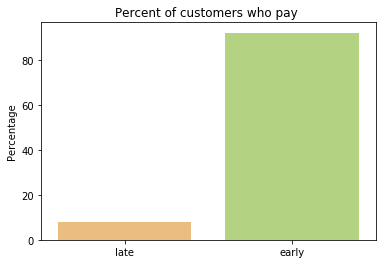

In [155]:
pay_diff_num=df_final[df_final['TARGET']==1]['TARGET'].value_counts()
pay_all_num=df_final[df_final['TARGET']==0]['TARGET'].value_counts()

percent_late_pay=np.array((pay_diff_num/len(df_final))*100) # percent of people who pay late
percent_timely_pay=np.array((pay_all_num/len(df_final))*100) #percent of all others who pay on time
stat_summ=pd.DataFrame({'Percentage':[percent_late_pay[0],percent_timely_pay[0]]},index=['late','early'])
sns.barplot(x=stat_summ.index,y=stat_summ['Percentage'],palette='RdYlGn')
plt.title('Percent of customers who pay ')
plt.show()

In [31]:
stat_summ            # summary of percentage of people who pay early vs on time 

,Percentage
late,7.724696
early,92.275304


### DATA IMBALANCE

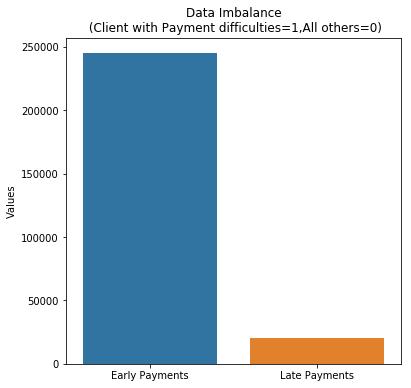

In [32]:
temp = df_final["TARGET"].value_counts()
df_imbl = pd.DataFrame({'Values': temp.values},index=['Early Payments','Late Payments'])
plt.figure(figsize = (6,6))
plt.title('Data Imbalance\n (Client with Payment difficulties=1,All others=0)')
sns.barplot(x =df_imbl.index, y="Values", data=df_imbl)
locs, labels = plt.xticks()
plt.show()

In [33]:
df_imbl

,Values
Early Payments,245014
Late Payments,20511


<h4>percentage of customers with payment difficulties</h4>

In [34]:
round(df_imbl.Values[0] / df_imbl['Values'].sum()*100,2)

92.28

<h4>percentage of customers with all other cases</h4>

In [35]:
round(df_imbl.Values[1] / df_imbl['Values'].sum()*100,2)

7.72

<b>Ratio of Data Imabalance</b>

In [36]:
 print(round((df_imbl.Values[0]/df_imbl.Values[1]),2))

11.95


<h4>Analysis of Data Imbalance for Target</h4>

We can find a a data imbalance here with respect to the Target variable of the dataset since the data points for Target=1 i.e applicants with payment difficulties is at around 7.72% only compared to the total number of applicants.<br>
This High Imbalance of Target Data can be removed with random re-sampling of the collected sample data in order to avoid any bias.<br>
<i>The ratio of 12:1 can create bias in data and thus is important to remove or redistribute in sampling data as uniformly distributed random data.</i>

### OUTLIER DETECTION

<h4>Outlier Detection for Amount of Money Credited and Target</h4>

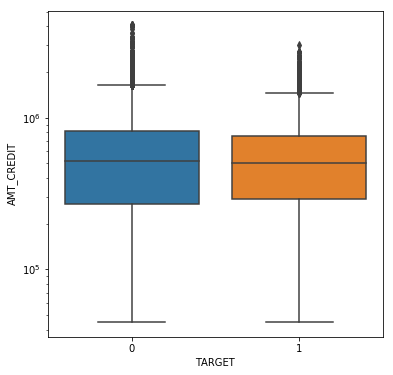

In [161]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET',y='AMT_CREDIT',data=df)
plt.yscale('log')
plt.show()

Here from the above boxplot between the Target and the Income of the client, we can find, the income for the clients who are having payment difficulties and other cases both are in similiar range with median value almost same. But most importantly,what we can notice is outlier values present in the dataset. There are outlier values present for both the Target cases, <b>but we can easily spot a High Income client present who had previously a payment difficulty</b>.

### UNIVARIATE ANALYSIS

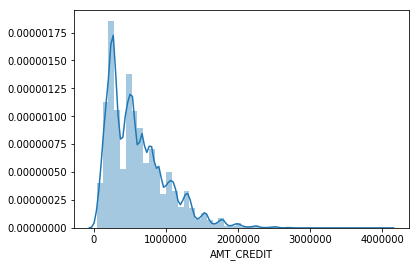

In [38]:
sns.distplot(df['AMT_CREDIT'])
plt.show()

The above Density Plot for Credited amount of the loan for the clients shows that majority of the loan amounts of the clients are below 10 Lakhs.

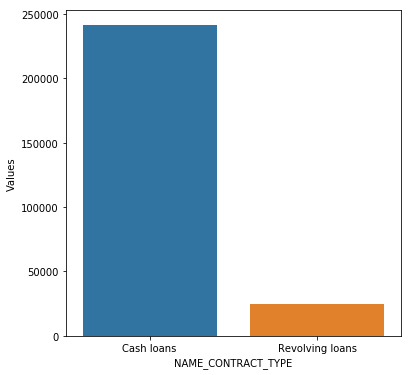

In [39]:
temp = df_final['NAME_CONTRACT_TYPE'].value_counts()
df2 = pd.DataFrame({'NAME_CONTRACT_TYPE': temp.index,'Values': temp.values})
plt.figure(figsize = (6,6))
sns.barplot(x = 'NAME_CONTRACT_TYPE', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.show()

In [40]:
round(df2.Values[0] / df2['Values'].sum(),2)*100

91.0

<b>So, around 90% of the client Loans are Cash Loans. Rest 10% are the only revolving Loans.</b>

Based on the Analysis Done above we find that the Number of People who don't have monetary problems are higher than the ones who have monetary Problems.<br>
But, unfortunately the Number of Cash Loans given out to Customers are higher than Revolving Loans.Revolving Loans has few benefits for both customers as well as Banks.<br>
<i><b>For Customers:</b></i><br>
    Customers who do pay loans on time and are capable, do not need to apply loan separately each time.This creates ease for customers to apply loans and avail easy loans without hassle, thus increasing chances of Customer retention.<br>
<i><b>For Banks:</b></i><br>
Banks can generate more revenue and easily charge more interest for successive loans applied from same customer and convince customer to apply loan from them without filing for a fresh loan anywhere else.<br>

<b>This also improves the credit Scores of Customers and helps banks to eliminate defaulters with low Credit Scores.</b>

In [41]:
#Converting the TARGET column to a categorical column with 'New_TARGET'
df_final['New_TARGET'] = df_final['TARGET'].apply(lambda x: 'Payment Difficulty' if x==1 else 'All Others')

### BIVARIATE ANALYSIS

In [42]:
#To find out the correlation between the income of the Clients and the Credit amount of the Loan.
curr = df_final[["AMT_INCOME_TOTAL", "AMT_CREDIT"]]
cor = curr.corr()
round(cor, 3)

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.000,0.149
AMT_CREDIT,0.149,1.000


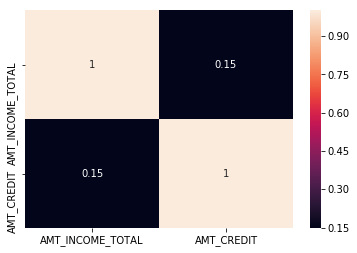

In [43]:
# heatmap
sns.heatmap(cor,annot=True)
plt.show()

The above Heatmap shows very low correlation between the Income of the Applicants and the Loan credited amount which in turn implies that even less income applicants have opted out for a large Loan amount and also high income applicant would have opted out for Small Loan amounts. 

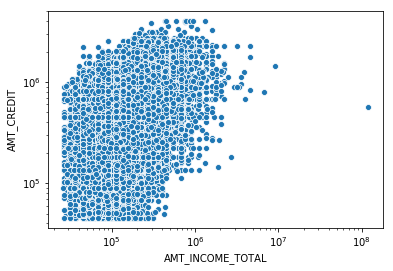

In [44]:
sns.scatterplot(x=df_final['AMT_INCOME_TOTAL'],y=df_final['AMT_CREDIT'])
plt.yscale('log')
plt.xscale('log')
plt.show()

This scatterplot gives us an important insight that the amount of default credit given to the people with lower total income is quite higher which may lead to defaulting.Also,above total income greater than 1000000,the amount of credit decreases.This can be due to be reasons like<br>
1.high income persons turn to default likely<br>
2.the banks may not have sufficient funds to credit customers.  

In [45]:

income_list_paydiff2=np.array(abs(df_final[df_final['TARGET']==1]['DAYS_BIRTH']).sort_values(ascending=True))
avg_age_paydiff=round(np.mean(income_list_paydiff2)/365,2) #minimum income of the people who have payment difficulties
income_list_allothers2=np.array(abs(df_final[df_final['TARGET']==0]['DAYS_BIRTH']).sort_values(ascending=True))
avg_age_others=round(np.mean(income_list_allothers2)/365,2) #minimum income of the people who have pay installments on time

In [46]:
print(avg_age_paydiff)#Average Age of customers with payment difficulty
print(avg_age_others)#Average Age of customers without payment difficulty

41.02
44.41


The Average Age of Customers who have difficult in paying is 41 years whereas those paying is time are on an average of 44 years.

<b><i>Analysis of the Customer Base based on Occupation Type</i></b>

As seen from the analysis above,the Labourers are the largest Customers. Let's analyse who among the labourers apply for loans most. 

In [47]:
df_final['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents',
       'Secretaries', 'High skill tech staff', 'IT staff', 'HR staff'],
      dtype=object)

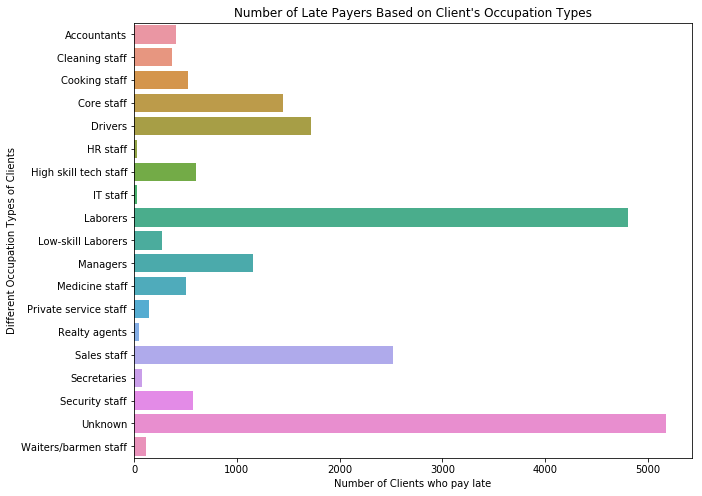

In [162]:
plt.figure(figsize=(10,8))
occu_df_late=df_final[df_final['TARGET']==1].groupby(df_final['OCCUPATION_TYPE']).count()
ax=sns.barplot(y=occu_df_late.index,x=occu_df_late['TARGET'])
ax.set(xlabel='Number of Clients who pay late',ylabel='Different Occupation Types of Clients')
plt.title("Number of Late Payers Based on Client's Occupation Types")
plt.show()


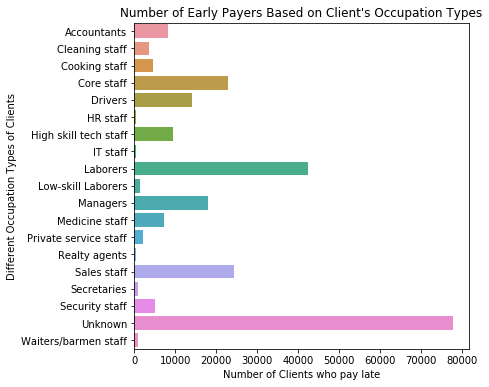

In [163]:
plt.figure(figsize=(6,6))
occu_df_early=df_final[df_final['TARGET']==0].groupby(df_final['OCCUPATION_TYPE']).count()
ax=sns.barplot(y=occu_df_early.index,x=occu_df_early['TARGET'])
ax.set(xlabel='Number of Clients who pay late',ylabel='Different Occupation Types of Clients')
plt.title("Number of Early Payers Based on Client's Occupation Types")
plt.show()

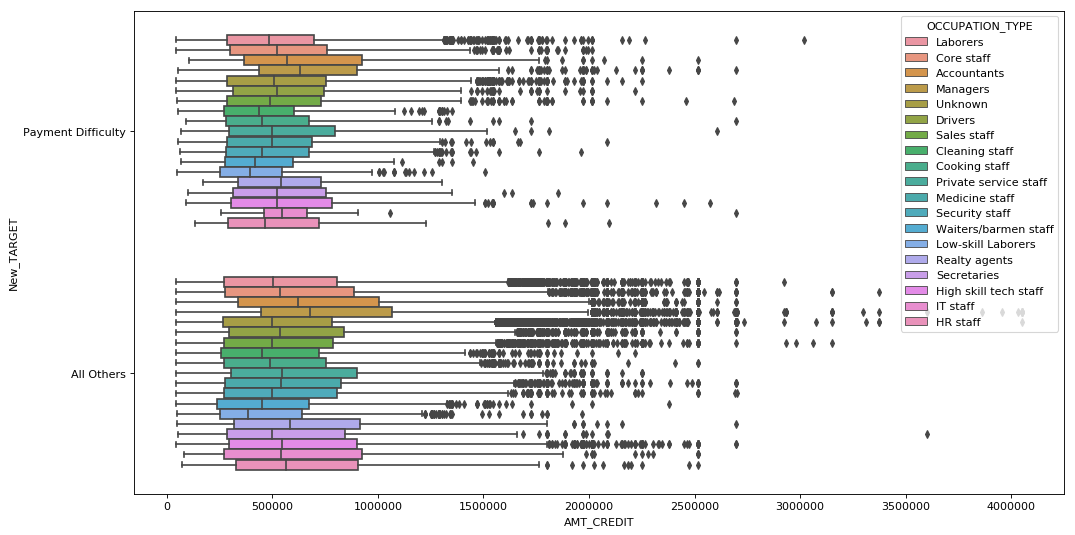

In [166]:
plt.figure(num=None, figsize=(15,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y='New_TARGET', x='AMT_CREDIT',hue="OCCUPATION_TYPE", data=df_final)
plt.show()

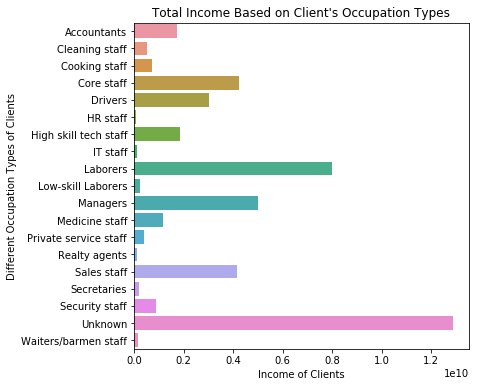

In [167]:
plt.figure(figsize=(6,6))
salary_df=df_final.groupby(df_final['OCCUPATION_TYPE']).sum()
ax=sns.barplot(y=salary_df.index,x=salary_df['AMT_INCOME_TOTAL'])
ax.set(xlabel='Income of Clients',ylabel='Different Occupation Types of Clients')
plt.title("Total Income Based on Client's Occupation Types")
plt.show()


As we can see here, the largest Customer Base of the Bank ,Laborers are also the highest number of people who have diffculty in payment.<br>
HR Staff and IT staff are have the lowest percentage of paying late debts and hence are most likely to repay their loans on time.<br><br>
<b>Anomalies</b>:<br>
    1.Laborers have highest total Income but are the ones highest in number who pay late due to payment difficulties.This shows that data collected is skewed/Biased and not random collection of Sample Data.<br><br>
    2.We see that the Laborers are the ones who are highest in late payments as well as in payments on right time.This clearly shows the data is biased and more labourers have been sampled in to form the sample data.<br>
    

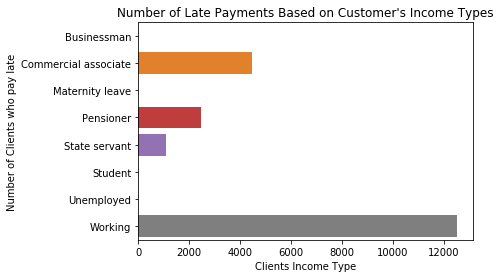

In [52]:
income_type_df=df_final.groupby('NAME_INCOME_TYPE').sum()
ax=sns.barplot(y=income_type_df.index,x=income_type_df['TARGET'])
ax.set(xlabel='Clients Income Type', ylabel='Number of Clients who pay late')
plt.title("Number of Late Payments Based on Customer's Income Types")
plt.show()


Based on the above graph, it is seen that Working Class of Customers find it hard to pay off their doubts on time.But, on the other hand it is also seen that Businessman do not pay late.<br>
<b><i>But very suspicious insights obtained is that how come Unemployed Customers and Students do not delay in paying debts.</i></b><br>
Customers with Maternity leaves can still get their maternity benefits with their regular salary.

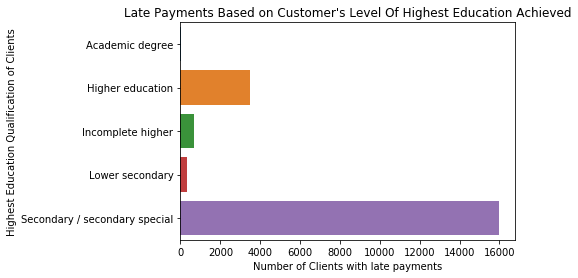

In [53]:
income_type_df=df_final.groupby('NAME_EDUCATION_TYPE').sum()
ax=sns.barplot(y=income_type_df.index,x=income_type_df['TARGET'])
ax.set(xlabel='Number of Clients with late payments',ylabel='Highest Education Qualification of Clients')
plt.title("Late Payments Based on Customer's Level Of Highest Education Achieved")
plt.show()

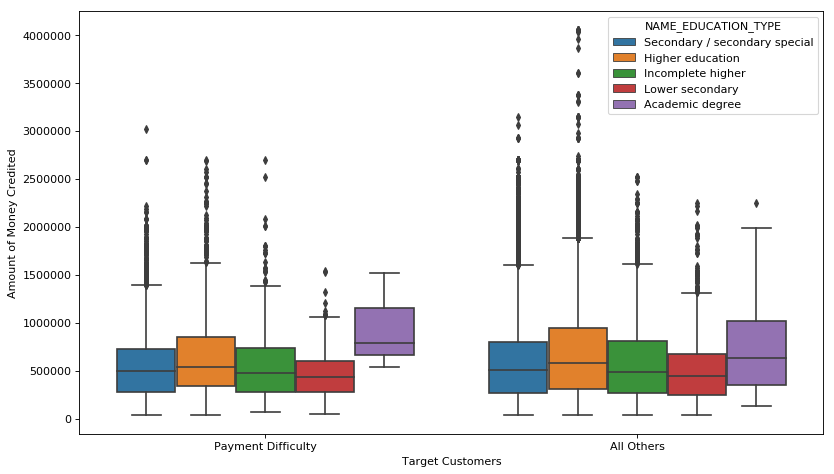

In [170]:
plt.figure(num=None, figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
ax=sns.boxplot(x='New_TARGET', y='AMT_CREDIT',hue="NAME_EDUCATION_TYPE", data=df_final)
ax.set(xlabel='Target Customers',ylabel='Amount of Money Credited')
plt.show()

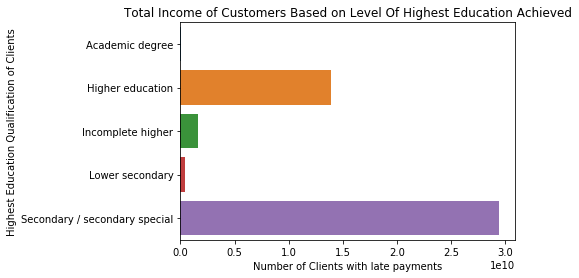

In [55]:
income_type_df=df_final.groupby('NAME_EDUCATION_TYPE').sum()
ax=sns.barplot(y=income_type_df.index,x=income_type_df['AMT_INCOME_TOTAL'])
ax.set(xlabel='Number of Clients with late payments',ylabel='Highest Education Qualification of Clients')
plt.title("Total Income of Customers Based on Level Of Highest Education Achieved")
plt.show()

<b>Anomalies:</b><br>
1.One Strange thing about the above analysis, how can the people with the lowest Education Recieved,i.e Lower Secondary has the minimum times where they paid off their debts late,eventhough their total income is very less <br><br>
2.From the box plot above we see that the average Credit given to the Clients with academic degree is highest for both who pay late and pay on time , but there is missing data on the total income of such clients.Hence we need to investigate the authenticity of the group,as maximum credit is given to them.

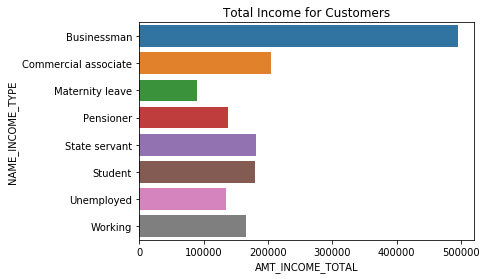

In [56]:
z=df_final.groupby(df_final['NAME_INCOME_TYPE']).mean()
sns.barplot(y=z.index,x=z['AMT_INCOME_TOTAL'])
plt.title("Total Income for Customers")
plt.show()

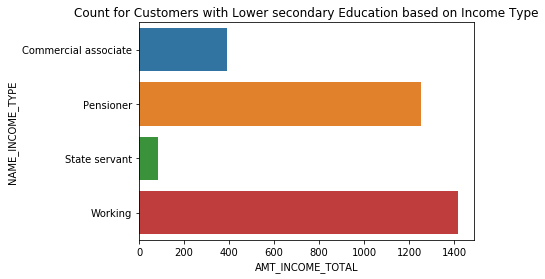

In [57]:
low_df=df_final[df_final['NAME_EDUCATION_TYPE']=='Lower secondary']
ab=low_df.groupby(low_df['NAME_INCOME_TYPE']).count()
sns.barplot(y=ab.index,x=ab['AMT_INCOME_TOTAL'])
plt.title("Count for Customers with Lower secondary Education based on Income Type")
plt.show()

<b>Anomalies:</b>
Thus, we see that Customers with Lower Secondary Education are mostly from Working Class, but still do not face any diffculty in paying their debts.<br>
This can be due to 2 reasons:<br>
1.They have a hidden source of income which is not mentioned in the dataset.<br>
2.They data may be corrupt or wrong data is provided.


<b>Analysis Based on Credit Score</b>

In [61]:
df_final['avg_norm_credit_score']=(df_final['EXT_SOURCE_1']+df_final['EXT_SOURCE_2']+df_final['EXT_SOURCE_3'])/3
df_final['avg_norm_credit_score'].head(5) # creating a new column for average credit score

0    0.161787
1         NaN
2         NaN
4         NaN
5         NaN
Name: avg_norm_credit_score, dtype: float64

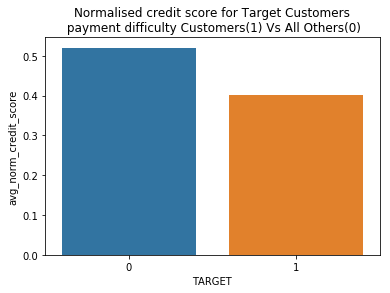

In [62]:
df_final_score=df_final.groupby(df_final['TARGET']).mean()
sns.barplot(x=df_final_score.index,y=df_final_score['avg_norm_credit_score'])
plt.title('Normalised credit score for Target Customers\n payment difficulty Customers(1) Vs All Others(0)')
plt.show()

In [63]:
diff=df_final_score['avg_norm_credit_score'].max() - df_final_score['avg_norm_credit_score'].min()
credit_diff_perc=diff/df_final_score['avg_norm_credit_score'].max() *100
round(credit_diff_perc,2) # percentage difference between avg credit score between Targets

22.82

Thus, we see that the Average Normalised Credit Score of Customers who pay on time is <b>22.83 %</b> higher than those who pay late due to payment difficulties

### Correlation

In [65]:
df_final.shape

(265525, 71)

In [66]:
payment_difficulites_df = df_final.loc[df_final['TARGET']==1]
all_other_cases_df = df_final.loc[df_final['TARGET']==0]

In [68]:
all_other_cases_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,New_TARGET,avg_norm_credit_score
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,All Others,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,All Others,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,All Others,NaN
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,All Others,NaN
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.774761,0.724000,0.492060,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,All Others,0.663607


In [69]:
curr1_payment_difficulites = payment_difficulites_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
curr2_all_other_cases = all_other_cases_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

In [71]:
cor1 = curr1_payment_difficulites.corr()
round(cor1, 3)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000,0.166,0.140
EXT_SOURCE_2,0.166,1.000,0.078
EXT_SOURCE_3,0.140,0.078,1.000


In [72]:
cor2 = curr2_all_other_cases.corr()
round(cor2, 3)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000,0.191,0.167
EXT_SOURCE_2,0.191,1.000,0.085
EXT_SOURCE_3,0.167,0.085,1.000


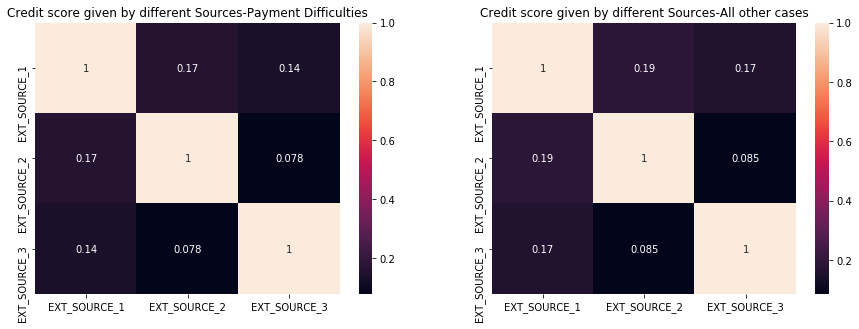

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Credit score given by different Sources-Payment Difficulties')
sns.heatmap(cor1,annot=True)
plt.subplot(1,2,2)
plt.title('Credit score given by different Sources-All other cases')
sns.heatmap(cor2,annot=True)
plt.show()

In both the cases i.e for applicants with payment difficulties as well as other cases, we can find very small correlation between all the 3 sources for normalised score out of which External Source 2 and External Source 3 are the least correlated. Hence while finding out for defaulters, only checking on the normalised score provided by these sources won't be efficient,since the scores provided would not be similiar.

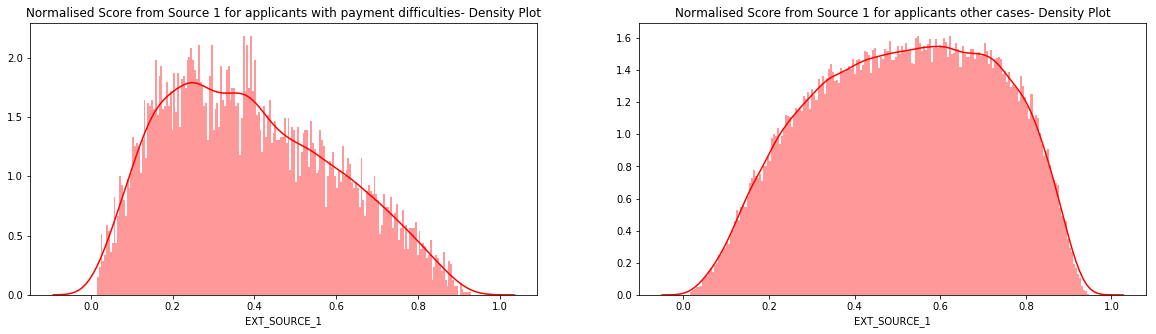

In [90]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Normalised Score from Source 1 for applicants with payment difficulties- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(payment_difficulites_df['EXT_SOURCE_1'],kde=True,bins=200, color="red")
plt.subplot(1,2,2)
plt.title('Normalised Score from Source 1 for applicants other cases- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(all_other_cases_df['EXT_SOURCE_1'],kde=True,bins=200, color="red")
plt.show()

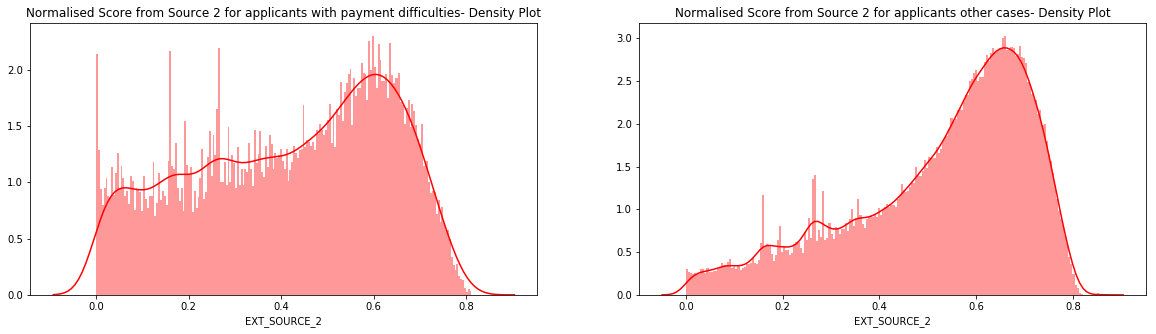

In [91]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Normalised Score from Source 2 for applicants with payment difficulties- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(payment_difficulites_df['EXT_SOURCE_2'],kde=True,bins=200, color="red")
plt.subplot(1,2,2)
plt.title('Normalised Score from Source 2 for applicants other cases- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(all_other_cases_df['EXT_SOURCE_2'],kde=True,bins=200, color="red")
plt.show()

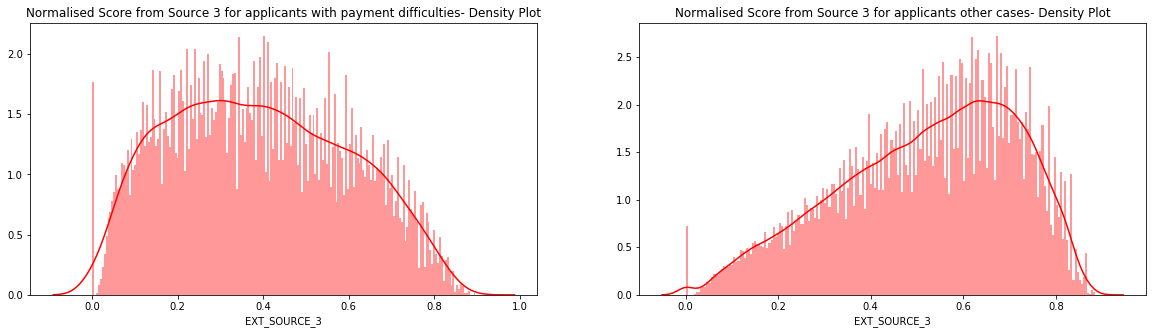

In [92]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Normalised Score from Source 3 for applicants with payment difficulties- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(payment_difficulites_df['EXT_SOURCE_3'],kde=True,bins=200, color="red")
plt.subplot(1,2,2)
plt.title('Normalised Score from Source 3 for applicants other cases- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(all_other_cases_df['EXT_SOURCE_3'],kde=True,bins=200, color="red")
plt.show()

From the above Density Plots, we can find for **External Source1** the density plot looks kind of inversely proportional for the normalised score for applicants with payment difficulties and the applicants other cases and looks valid **since we Expect the Normalised score to be less for applicants with payment diffculties.**

Whereas, for **External Source2**, we can find a high density for high normalised scores even for applicants with payment difficulties as well as in other cases. Since the score would be generated based on the previous loan instances of the applicants, this score might show high, as there won't be any previous loan application by the applicant. This can be one case. <br>
But in other ways, we can also find  from the External Source 1 and 3,where the normalised score is less for applicants with payment difficulty which contradicts the density plot of External Source 2 considering the same data points used. <br>
Hence it would be better not to just depend only on the normalised scores for judging the applicant to be defaulter.

Hence individual density plots gave us an idea why there is less correlation between the different Normalised scores as seen before.

In [100]:
curr_flag_payment_difficulites = payment_difficulites_df[["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]]
curr_flag_other_cases = all_other_cases_df[["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]]

In [104]:
cor3 = curr_flag_payment_difficulites.corr()
round(cor3,2)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
FLAG_DOCUMENT_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_3,NaN,1.00,NaN,-0.23,-0.48,-0.02,-0.54,-0.10,NaN,-0.09,NaN,-0.01,-0.00,-0.01,0.01,NaN,0.02,0.01,0.00,-0.03
FLAG_DOCUMENT_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_5,NaN,-0.23,NaN,1.00,-0.03,-0.00,-0.04,-0.01,NaN,-0.01,NaN,-0.00,-0.00,-0.00,-0.01,NaN,-0.01,-0.00,-0.00,-0.00
FLAG_DOCUMENT_6,NaN,-0.48,NaN,-0.03,1.00,-0.00,-0.07,-0.01,NaN,-0.01,NaN,-0.01,-0.01,-0.01,-0.02,NaN,-0.02,0.00,0.00,-0.01
FLAG_DOCUMENT_7,NaN,-0.02,NaN,-0.00,-0.00,1.00,-0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,-0.00,NaN,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_8,NaN,-0.54,NaN,-0.04,-0.07,-0.00,1.00,-0.02,NaN,-0.01,NaN,0.04,0.03,0.03,0.03,NaN,-0.01,-0.01,0.00,0.02
FLAG_DOCUMENT_9,NaN,-0.10,NaN,-0.01,-0.01,-0.00,-0.02,1.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,0.02,NaN,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_11,NaN,-0.09,NaN,-0.01,-0.01,-0.00,-0.01,-0.00,NaN,1.00,NaN,-0.00,-0.00,-0.00,-0.00,NaN,-0.00,-0.00,-0.00,-0.00


In [105]:
cor4 = curr_flag_other_cases.corr()
round(cor4,2)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
FLAG_DOCUMENT_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_3,NaN,1.00,-0.02,-0.19,-0.49,-0.02,-0.47,-0.10,-0.01,-0.09,-0.0,-0.02,0.00,0.00,0.04,0.00,0.01,0.01,0.01,-0.03
FLAG_DOCUMENT_4,NaN,-0.02,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_5,NaN,-0.19,-0.00,1.00,-0.04,-0.00,-0.04,-0.01,-0.00,-0.01,-0.0,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00
FLAG_DOCUMENT_6,NaN,-0.49,-0.00,-0.04,1.00,-0.00,-0.09,-0.02,-0.00,-0.02,-0.0,-0.02,-0.02,-0.01,-0.03,-0.00,-0.03,-0.01,-0.01,-0.01
FLAG_DOCUMENT_7,NaN,-0.02,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_8,NaN,-0.47,-0.00,-0.04,-0.09,-0.00,1.00,-0.02,-0.00,-0.02,0.0,0.08,0.03,0.03,0.01,0.01,0.01,0.00,0.00,-0.00
FLAG_DOCUMENT_9,NaN,-0.10,-0.00,-0.01,-0.02,-0.00,-0.02,1.00,-0.00,-0.00,-0.0,0.00,0.00,0.00,0.01,0.01,0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_10,NaN,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
FLAG_DOCUMENT_11,NaN,-0.09,-0.00,-0.01,-0.02,-0.00,-0.02,-0.00,-0.00,1.00,-0.0,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00


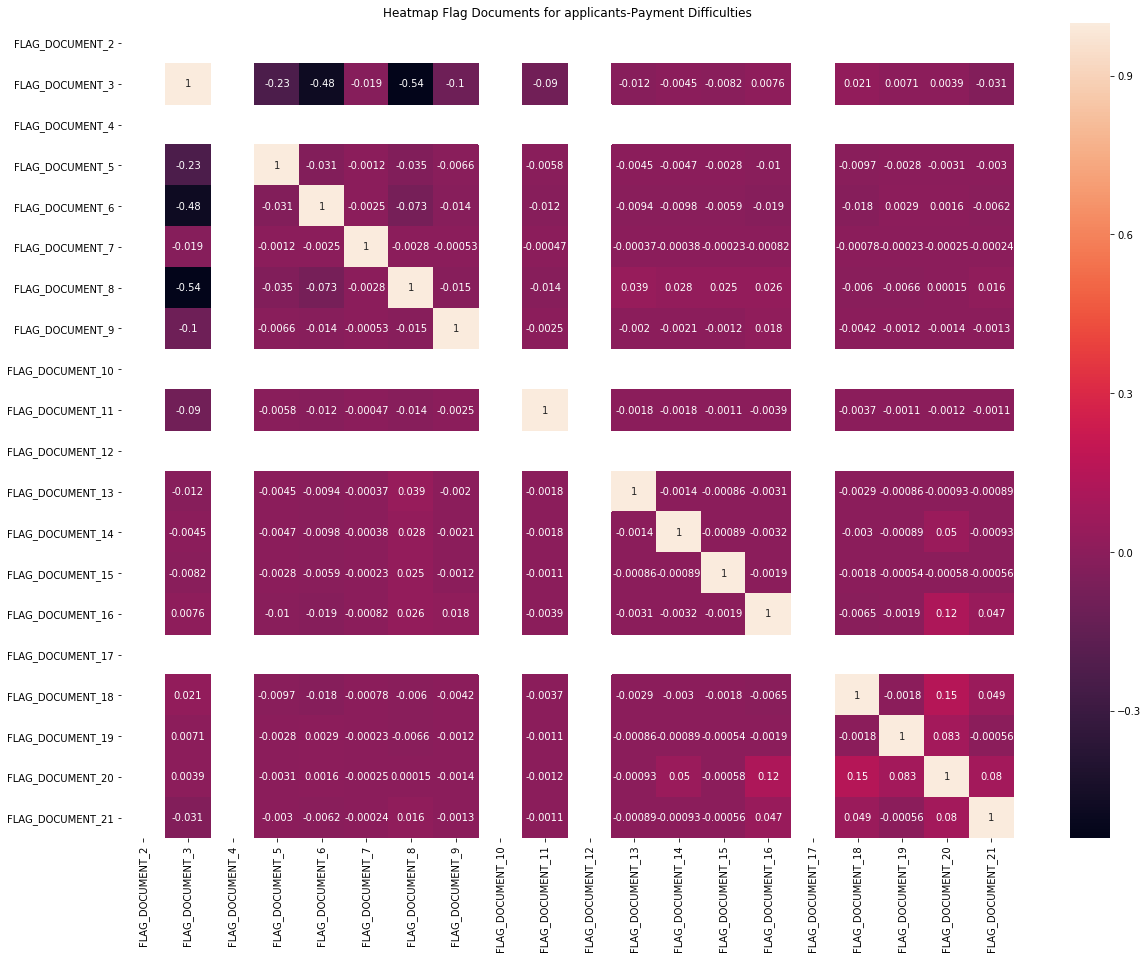

In [107]:
plt.figure(figsize=(20,15))
plt.title('Heatmap Flag Documents for applicants-Payment Difficulties')
sns.heatmap(cor3,annot=True)
plt.show()

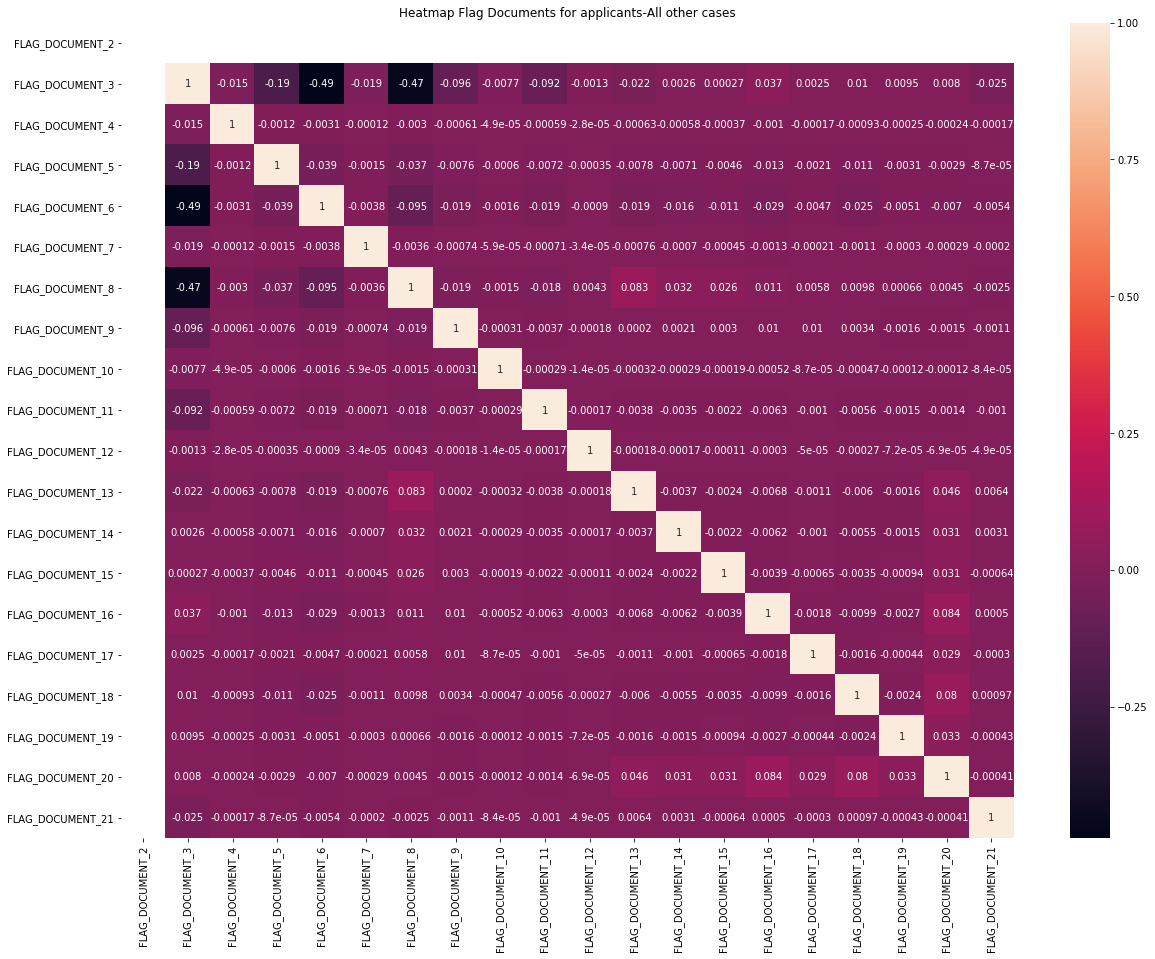

In [109]:
plt.figure(figsize=(20,15))
plt.title('Heatmap Flag Documents for applicants-All other cases')
sns.heatmap(cor4,annot=True)
plt.show()

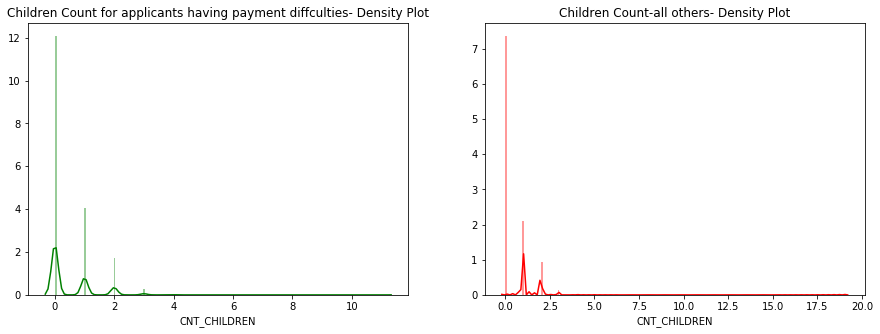

In [135]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Children Count for applicants having payment diffculties- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(payment_difficulites_df['CNT_CHILDREN'],kde=True,bins=200, color="green")
plt.subplot(1,2,2)
plt.title('Children Count-all others- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(all_other_cases_df['CNT_CHILDREN'],kde=True,bins=200, color="red")
plt.show()

In [127]:
payment_difficulites_df_less_hundred = payment_difficulites_df.loc[payment_difficulites_df['DAYS_REGISTRATION'] >= -365]

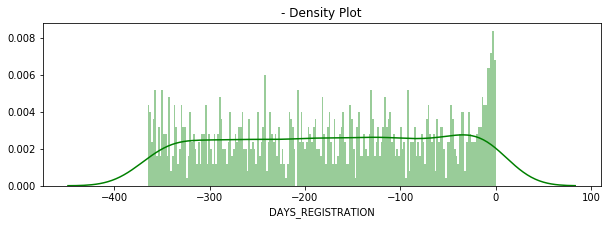

In [128]:
plt.figure(figsize = (10,3))
plt.title('- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(payment_difficulites_df_less_hundred['DAYS_REGISTRATION'],kde=True,bins=200, color="green")
#sns.distplot(all_other_cases_df['CNT_FAM_MEMBERS'],kde=True,bins=200, color="red")
plt.show()